In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
df = pd.read_csv("smart_class_energy_data.csv")

In [5]:
print(df.head())

   Num_Students  Outdoor_Temp Time_of_Day   Humidity  Lights_On  Windows_Open  \
0            33     34.714868     Morning  69.221654          1             0   
1            73     27.689434     Evening  75.267053          1             1   
2            73     38.544262   Afternoon  69.683302          0             0   
3             7     33.203330     Evening  89.243701          1             0   
4            35     33.565462     Evening  68.174341          0             0   

   Fan_Speed    AC_Temp  
0          2  26.911474  
1          4  22.531882  
2          3  23.523407  
3          4  22.411541  
4          1  26.139862  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Num_Students  500 non-null    int64  
 1   Outdoor_Temp  500 non-null    float64
 2   Time_of_Day   500 non-null    object 
 3   Humidity      500 non-null    float64
 4   Lights_On     500 non-null    int64  
 5   Windows_Open  500 non-null    int64  
 6   Fan_Speed     500 non-null    int64  
 7   AC_Temp       500 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 31.4+ KB
None


In [7]:
df.isnull().sum()


Num_Students    0
Outdoor_Temp    0
Time_of_Day     0
Humidity        0
Lights_On       0
Windows_Open    0
Fan_Speed       0
AC_Temp         0
dtype: int64

In [8]:
df.dropna()


,Num_Students,Outdoor_Temp,Time_of_Day,Humidity,Lights_On,Windows_Open,Fan_Speed,AC_Temp
0,33,34.714868,Morning,69.221654,1,0,2,26.911474
1,73,27.689434,Evening,75.267053,1,1,4,22.531882
2,73,38.544262,Afternoon,69.683302,0,0,3,23.523407
3,7,33.203330,Evening,89.243701,1,0,4,22.411541
4,35,33.565462,Evening,68.174341,0,0,1,26.139862
...,...,...,...,...,...,...,...,...
495,31,35.311169,Evening,71.632427,1,1,3,23.411115
496,62,33.835296,Evening,77.747009,1,0,4,21.676222
497,47,26.515593,Afternoon,78.597107,0,1,4,20.370864
498,33,35.886481,Afternoon,59.353728,1,1,5,20.237912


In [9]:
x = df[['Outdoor_Temp','Humidity', 'Lights_On', 'Windows_Open', 'Fan_Speed']]
y = df['AC_Temp']


In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(x_test)


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 2.0300589371527535
R2 Score: 0.43217731032695084


In [14]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 28.80177429167107
Coefficients: [-0.03770083 -0.0199945  -0.06375517 -0.05940963 -0.96938194]


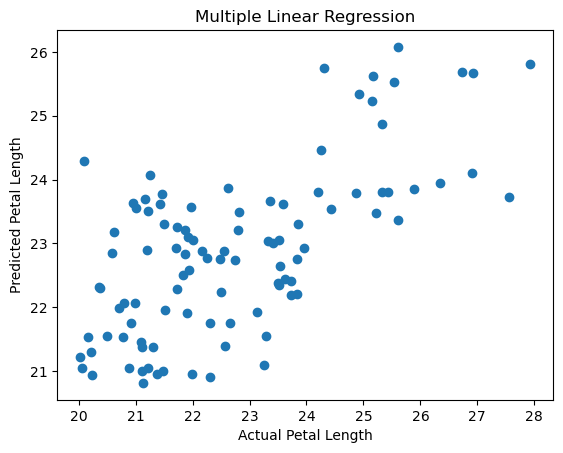

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Multiple Linear Regression")
plt.show()
